## STT: 68
## Họ và tên: Nguyễn Cao Thắng
## Lớp: IE224.P11
## Buổi  - Bài tập áp dụng
## Ghi chú, hoặc Lưu ý:

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Dataset/dataset.csv', header=0)

In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7972604345,20140519T000000,137000.0,3.0,1.00,950,7620.0,1.0,0,0.0,...,6,950,0.0,1954,0,98106,47.5178,-122.346,1260,7620
1,4365200186,20140606T000000,253500.0,2.0,1.00,810,4800.0,1.0,0,0.0,...,7,810,0.0,1948,0,98126,47.5232,-122.375,1240,7740
2,2722049077,20140828T000000,299500.0,3.0,1.75,1810,34500.0,1.0,0,0.0,...,8,1230,580.0,1980,0,98032,47.3707,-122.275,2090,9735
3,221049191,20150428T000000,329500.0,3.0,2.50,2120,22482.0,1.0,0,0.0,...,7,1360,760.0,1979,0,98001,47.3410,-122.265,2330,16016
4,7228500610,20150330T000000,NaN,2.0,1.00,1070,5280.0,1.0,0,0.0,...,6,1070,0.0,1900,0,98122,47.6168,-122.303,1380,2370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,5379800810,20140807T000000,198000.0,2.0,1.00,790,14200.0,1.0,0,0.0,...,7,790,0.0,1951,0,98188,47.4590,-122.285,1430,10000
20996,2909300640,20140723T000000,884744.0,4.0,3.50,4210,9414.0,2.0,0,0.0,...,9,4210,0.0,2001,0,98074,47.6067,-122.022,3950,8880
20997,3826000280,20150429T000000,272000.0,3.0,1.00,1130,8100.0,1.5,0,0.0,...,6,1130,0.0,1934,0,98168,47.4935,-122.306,1080,8100
20998,5502700005,20140625T000000,330000.0,6.0,2.25,3040,28535.0,1.0,0,0.0,...,8,1890,1150.0,1951,0,98030,47.3864,-122.223,1360,8250


## Câu 1. Xử lý các giá trị khuyết

In [6]:
# Xác định số giá trị thiếu trong mỗi cột
missing_values_count = df.isnull().sum()
df_missing = missing_values_count[missing_values_count > 0]
df_missing

price             2
bedrooms         15
bathrooms        12
sqft_lot          3
view              4
sqft_basement     3
dtype: int64

In [7]:
# Điền khuyết giá trị bằng giá trị trung bình cho các cột sqft_lot, sqft_basement
df['sqft_lot'] = df['sqft_lot'].fillna(df['sqft_lot'].mean())
df['sqft_basement'] = df['sqft_basement'].fillna(df['sqft_basement'].mean())

# Điền khuyết bằng giá trị xuất hiện nhiều nhất cho cột bathrooms, view
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['view'] = df['view'].fillna(df['view'].mode()[0])

# Điền khuyết bằng giá trị ở trên cho cột bedrooms
df['bedrooms'] = df['bedrooms'].fillna(method='ffill')

# Loại bỏ các mẫu dữ liệu bị khuyết giá trị price
df = df.dropna(subset=['price'])
df

C:\Users\aboyw\AppData\Local\Temp\ipykernel_6524\731176031.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['bedrooms'] = df['bedrooms'].fillna(method='ffill')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7972604345,20140519T000000,137000.0,3.0,1.00,950,7620.0,1.0,0,0.0,...,6,950,0.0,1954,0,98106,47.5178,-122.346,1260,7620
1,4365200186,20140606T000000,253500.0,2.0,1.00,810,4800.0,1.0,0,0.0,...,7,810,0.0,1948,0,98126,47.5232,-122.375,1240,7740
2,2722049077,20140828T000000,299500.0,3.0,1.75,1810,34500.0,1.0,0,0.0,...,8,1230,580.0,1980,0,98032,47.3707,-122.275,2090,9735
3,221049191,20150428T000000,329500.0,3.0,2.50,2120,22482.0,1.0,0,0.0,...,7,1360,760.0,1979,0,98001,47.3410,-122.265,2330,16016
5,8141310030,20140730T000000,256703.0,3.0,2.00,1670,4441.0,1.0,0,0.0,...,7,1670,0.0,2014,0,98022,47.1948,-121.975,1670,4622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,5379800810,20140807T000000,198000.0,2.0,1.00,790,14200.0,1.0,0,0.0,...,7,790,0.0,1951,0,98188,47.4590,-122.285,1430,10000
20996,2909300640,20140723T000000,884744.0,4.0,3.50,4210,9414.0,2.0,0,0.0,...,9,4210,0.0,2001,0,98074,47.6067,-122.022,3950,8880
20997,3826000280,20150429T000000,272000.0,3.0,1.00,1130,8100.0,1.5,0,0.0,...,6,1130,0.0,1934,0,98168,47.4935,-122.306,1080,8100
20998,5502700005,20140625T000000,330000.0,6.0,2.25,3040,28535.0,1.0,0,0.0,...,8,1890,1150.0,1951,0,98030,47.3864,-122.223,1360,8250


In [8]:
# Kiểm tra lại có còn giá trị khuyết nào không
missing_values_count = df.isnull().sum()
df_missing = missing_values_count[missing_values_count > 0]
df_missing

Series([], dtype: int64)

## Câu 2. Trực quan biến 'floors'

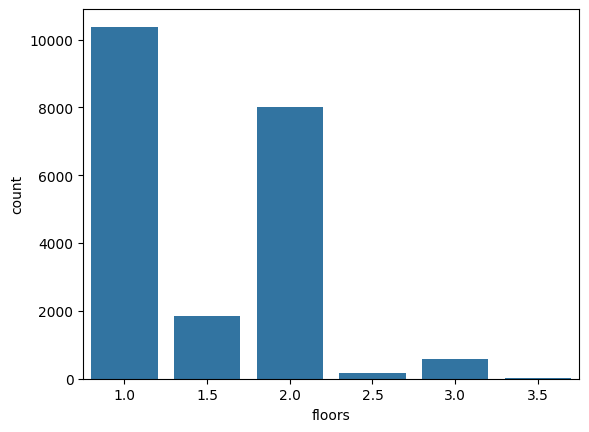

In [9]:
# Trực quan biến "floor" bằng biểu đồ cột
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='floors', data=df)
plt.show()

<p> Đánh giá kết quả trực quan: số lượng nhà có 1 tầng chiếm hơn 10000 mẫu dữ liệu (khoảng một nửa dataset), tiếp đến là nhà có 2 tầng, penthouse 1,5 tầng, nhà 3 tầng. Penthouse 2,5 tầng và 3,5 tầng chiếm số lượng nhà ít nhất. </p>

## Câu 3. Trực quan biến 'waterfront'

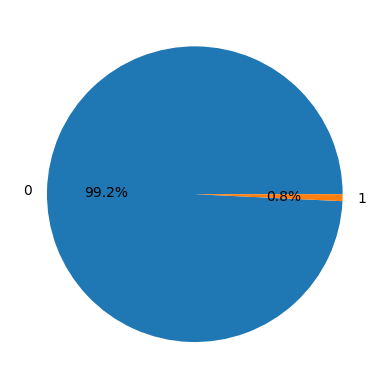

In [10]:
# Trực quan biến "waterfront" bằng biểu đồ tròn
waterfront_count = df['waterfront'].value_counts()
plt.pie(waterfront_count, labels=waterfront_count.index, autopct='%1.1f%%')
plt.show()

<p> Đánh giá kết quả trực quan: Hầu hết các căn nhà đều không có góc nhìn ra sông. </p>

## Câu 4. Sử dụng trực quan regplot để đánh giá, kiểm tra thử ảnh hưởng của các biến loại diện tích (sqft _... ) so với giá. Phác họa trên cùng một hình. Sau đó, bình luận các kết quả?

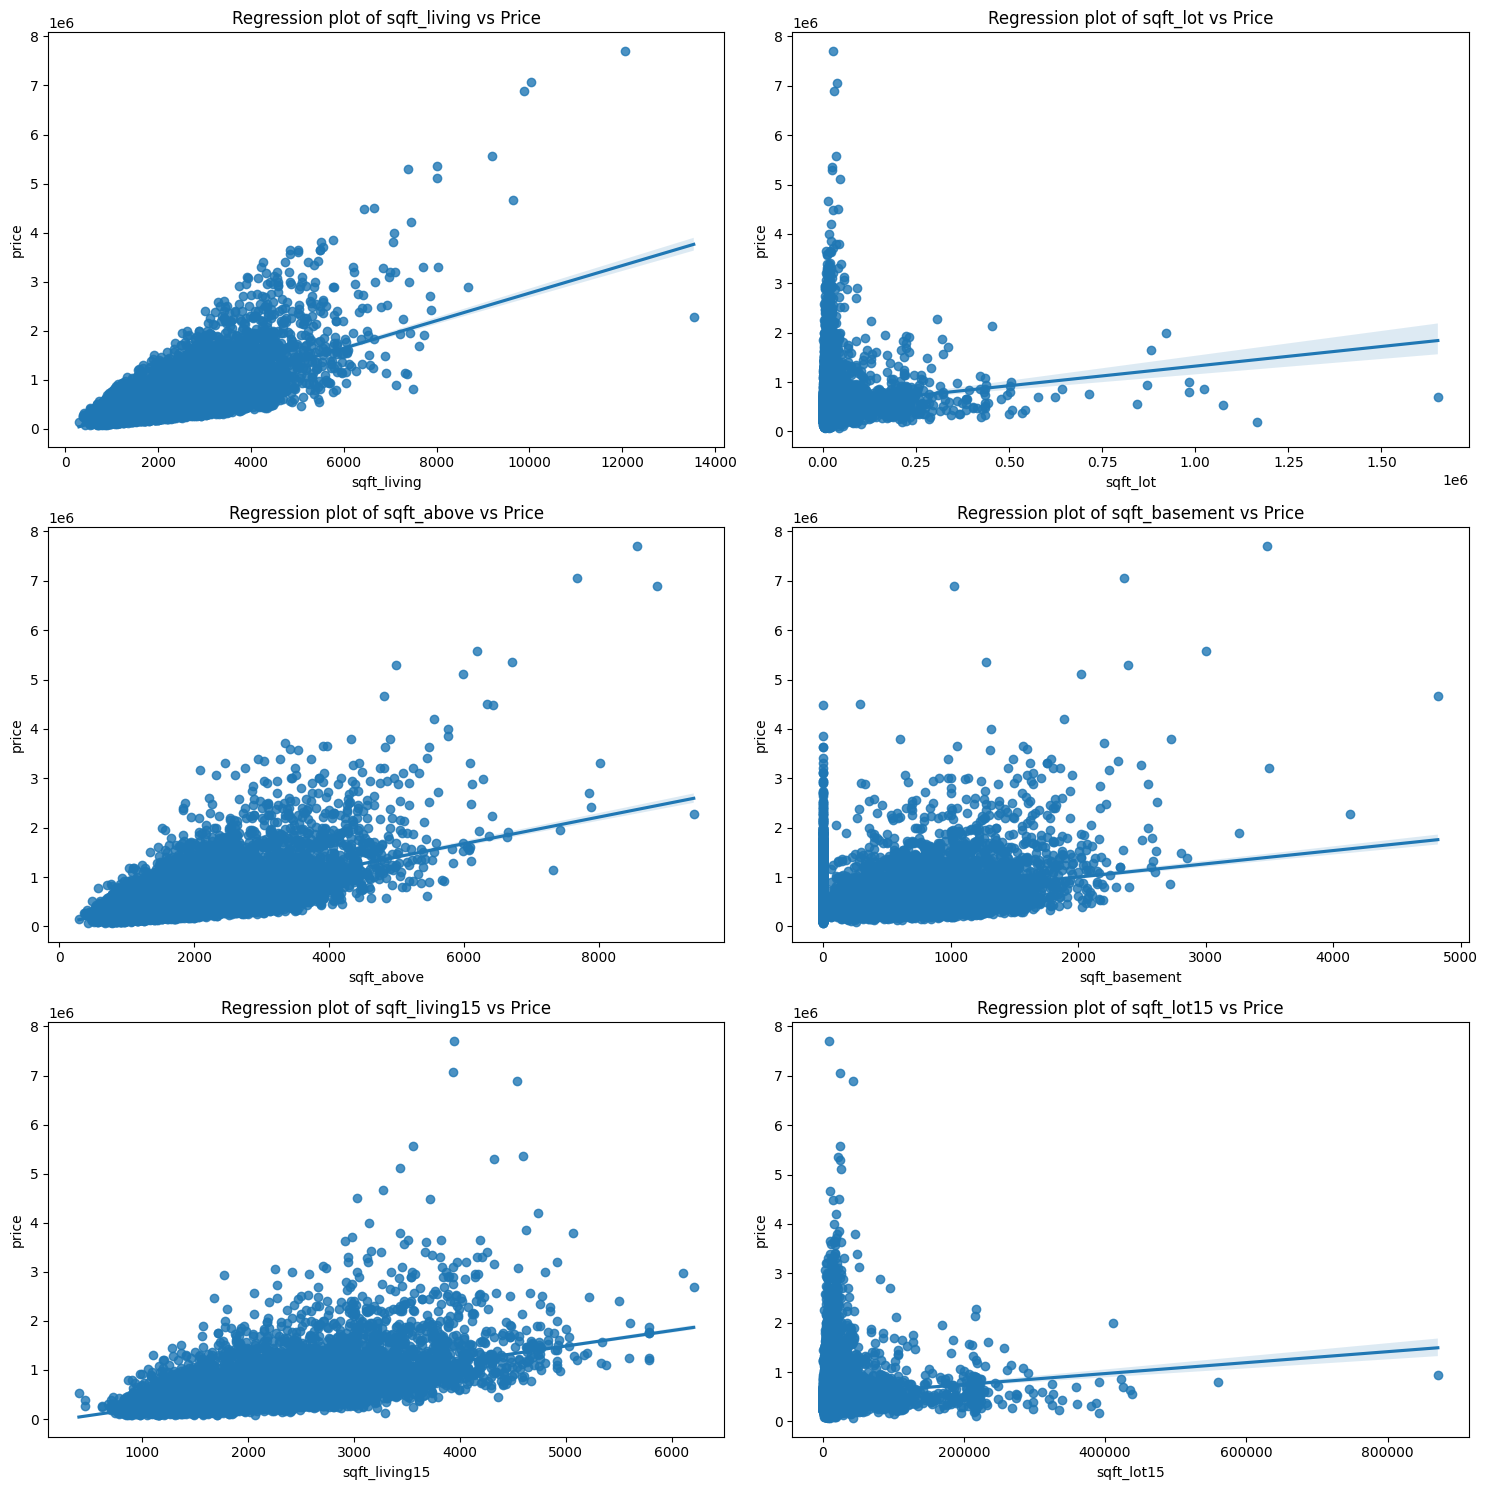

In [11]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Danh sách các biến diện tích
area_vars = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

# Vẽ biểu đồ phân phối của các biến diện tích
for var, ax in zip(area_vars, axes.flatten()):
    sns.regplot(x=var, y='price', data=df, ax=ax)
    ax.set_title(f'Regression plot of {var} vs Price')

plt.tight_layout()
plt.show()

<p> Đối với các biến sqft_living, sqft_above, sqft_living15: các biến này có quan hệ tuyến tính với price theo chiều dương, các điểm dữ liệu phần lớn tập trung xung quanh đường hồi quy, nên có thể kết luận các biến này có ảnh hưởng lớn đến giá nhà. </p>
<p> Đối với các biến sqft_lot, sqft_lot15, sqft_basement: các biến này có mối quan hệ tuyến tính rất thiếu rõ ràng hoặc gần như không có quan hệ do sự hỗn loạn trong phân bố của các điểm dữ liệu, có thể kết luận các biến này ít ảnh hưởng đến giá nhà </p>

## Câu 5. Xây dựng mô hình thích hợp dự đoán giá nhà từ các biến sau "floors", "view", "waterfront", "bedrooms", "grade", "bathrooms", "sqft_living15", "sqft_above", "sqft_living", "sqft_basement". (Yêu cầu: phải áp dụng kỹ thuật Pipeline và thang đo thích hợp nhất).

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Tạo pipeline
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [13]:
# Chọn các biến đầu vào và biến mục tiêu
X = df[['floors', 'view', 'waterfront', 'bedrooms', 'grade', 'bathrooms', 'sqft_living15', 'sqft_above', 'sqft_living', 'sqft_basement']]
y = df['price']

# Huấn luyện mô hình
pipe.fit(X, y)

# Dự đoán giá nhà
y_pred = pipe.predict(X)
y_pred

array([269678.625, 305150.625, 531769.25 , ..., 300920.625, 552931.875,
       484102.375])

Mean squared error: 43274420911.93022
R^2: 0.6803698215955397


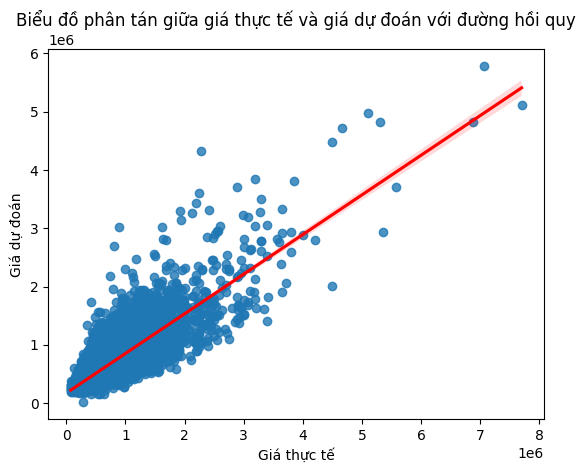

In [14]:
# Đánh giá với MSE và R^2
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print('Mean squared error:', mse)
print('R^2:', r2)

# Trực quan hóa kết quả bằng biểu đồ phân tán với đường hồi quy
sns.regplot(x=y, y=y_pred, line_kws={"color": "red"})
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.title('Biểu đồ phân tán giữa giá thực tế và giá dự đoán với đường hồi quy')
plt.show()

<p> Nhận xét: chỉ số R-squared tốt, tuy nhiên MSE còn khá cao, chứng tỏ mô hình chỉ mới có độ chính xác vừa phải. Đường hồi quy đi khá khít với các điểm dữ liệu, các điểm dữ liệu phân tán tương đối đều quanh đường hồi quy, tuy nhiên vẫn có một số điểm nằm xa hơn. </p>

## Câu 6. Nhà có condition, floors, bedrooms như thế nào thì có giá trung bình ảnh hưởng lớn nhất?

condition
1    334431.666667
2    323451.431138
3    542299.778788
4    522256.717135
5    611920.442494
Name: price, dtype: float64


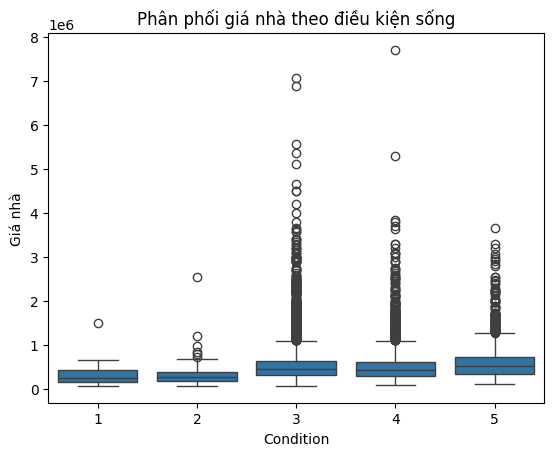

In [16]:
# Tính giá nhà trung bình theo từng điều kiện
avg_price_by_condition = df.groupby('condition')['price'].mean()
print(avg_price_by_condition)

# Biểu đồ boxplot giữa giá nhà và điều kiện nhà
sns.boxplot(x='condition', y='price', data=df)
plt.title("Phân phối giá nhà theo điều kiện sống")
plt.xlabel("Condition")
plt.ylabel("Giá nhà")
plt.show()

In [27]:
# Tính hệ số biến thiên của giá nhà theo từng điều kiện
cv_by_condition = df.groupby('condition')['price'].std() / df.groupby('condition')['price'].mean()
print(cv_by_condition)

condition
1    0.810847
2    0.754889
3    0.672898
4    0.690771
5    0.671070
Name: price, dtype: float64


In [26]:
# Phân tích ANOVA giữa giá nhà và điều kiện nhà
import scipy.stats as stats

f_val, p_val = stats.f_oneway(df['price'][df['condition'] == 1], df['price'][df['condition'] == 2], df['price'][df['condition'] == 3], df['price'][df['condition'] == 4], df['price'][df['condition'] == 5])
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 36.14932721575879 , P = 3.72298263810337e-30


<p> Nhận xét: Trong các giá trị condition từ 1 đến 5, nếu không tính các ngoại lệ do ảnh hưởng từ yếu tố khác thì giá trị 5 sẽ tương ứng với giá nhà cao nhất. </p>
<p> Đồng thời, ở mức condition 5, giá nhà có độ biến thiên so với giá trị trung bình thấp nhất, giá nhà dễ dàng được dự đoán hơn. </p>
<p> Kết quả phân tích ANOVA có F cao, cho thấy rằng có sự khác biệt đáng kể giữa giá nhà trung bình ở các nhóm condition, ở đây là tăng dần, đồng thời P thấp cho thấy rằng condition có vai trò quan trọng trong việc quyết định giá nhà. </p>

floors
1.0    4.423063e+05
1.5    5.600156e+05
2.0    6.494396e+05
2.5    1.060346e+06
3.0    5.804584e+05
3.5    9.333125e+05
Name: price, dtype: float64


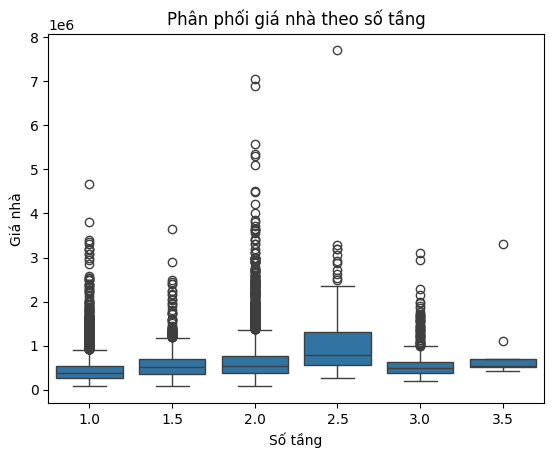

In [28]:
# Tính giá nhà trung bình theo từng số tầng
avg_price_by_floors = df.groupby('floors')['price'].mean()
print(avg_price_by_floors)

# Biểu đồ boxplot giữa giá nhà và số tầng
sns.boxplot(x='floors', y='price', data=df)
plt.title("Phân phối giá nhà theo số tầng")
plt.xlabel("Số tầng")
plt.ylabel("Giá nhà")
plt.show()

In [29]:
# Tính hệ số biến thiên của giá nhà theo từng số tầng
cv_by_floors = df.groupby('floors')['price'].std() / df.groupby('floors')['price'].mean()
print(cv_by_floors)

floors
1.0    0.598754
1.5    0.543720
2.0    0.668622
2.5    0.809414
3.0    0.586270
3.5    1.048541
Name: price, dtype: float64


In [31]:
# Phân tích ANOVA giữa giá nhà và số tầng
floor_groups = [df['price'][df['floors'] == x] for x in df['floors'].unique() if len(df['price'][df['floors'] == x]) > 1]

f_val, p_val = stats.f_oneway(*floor_groups)
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 389.59539944051295 , P = 0.0


<p> Nhận xét: Trong các giá trị số tầng, nếu không tính các ngoại lệ do ảnh hưởng từ yếu tố khác, giá penthouse 2.5 tầng có mức giá cao nhất. </p>
<p> Tuy nhiên, giá penthouse 2.5 tầng và 3.5 tầng có độ biến thiên rất cao, khó dự đoán được chính xác giá nhà của những căn nhà này. </p>
<p> Kết quả phân tích ANOVA có F cao, cho thấy rằng có sự khác biệt đáng kể giữa giá nhà trung bình ở các nhóm số tầng, ở đây là sự khác biệt giữa penthouse và nhà thông thường, đồng thời P thấp cho thấy rằng số tầng có vai trò quan trọng trong việc quyết định giá nhà. </p>

bedrooms
1.0     3.187574e+05
2.0     4.019535e+05
3.0     4.666502e+05
4.0     6.344825e+05
5.0     7.883813e+05
6.0     8.242896e+05
7.0     9.566221e+05
8.0     1.105077e+06
9.0     8.939998e+05
10.0    8.193333e+05
11.0    5.200000e+05
33.0    6.400000e+05
Name: price, dtype: float64


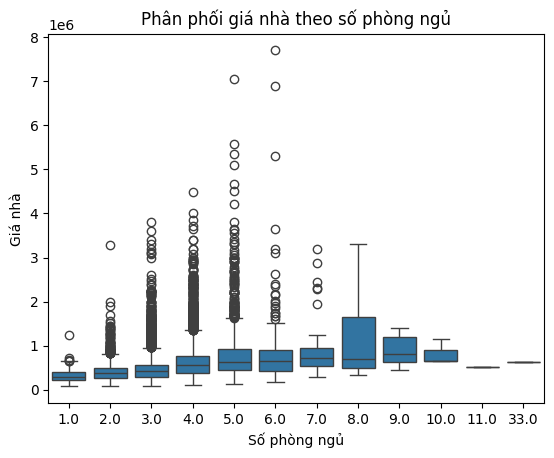

In [34]:
# Tính giá nhà trung bình theo từng số phòng ngủ
avg_price_by_bedrooms = df.groupby('bedrooms')['price'].mean()
print(avg_price_by_bedrooms)

# Biểu đồ boxplot giữa giá nhà và số phòng ngủ
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title("Phân phối giá nhà theo số phòng ngủ")
plt.xlabel("Số phòng ngủ")
plt.ylabel("Giá nhà")
plt.show()

In [35]:
# Tính hệ số biến thiên của giá nhà theo từng số phòng ngủ
cv_by_bedrooms = df.groupby('bedrooms')['price'].std() / df.groupby('bedrooms')['price'].mean()
print(cv_by_bedrooms)

bedrooms
1.0     0.471181
2.0     0.495555
3.0     0.564288
4.0     0.610232
5.0     0.762585
6.0     0.974338
7.0     0.783371
8.0     0.812157
9.0     0.426772
10.0    0.347450
11.0         NaN
33.0         NaN
Name: price, dtype: float64


In [36]:
# Phân tích ANOVA giữa giá nhà và số phòng ngủ
bedroom_groups = [df['price'][df['bedrooms'] == x] for x in df['bedrooms'].unique() if len(df['price'][df['bedrooms'] == x]) > 1]

f_val, p_val = stats.f_oneway(*bedroom_groups)
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 275.93511016681794 , P = 0.0


<p> Nhận xét: Trong các giá trị số phòng ngủ, nếu không tính các ngoại lệ do ảnh hưởng từ yếu tố khác thì giá của nhà có 8 phòng ngủ là cao nhất. </p>
<p> Tuy nhiên, giá các căn nhà có từ 5-8 phòng ngủ có độ biến thiên rất cao, khó có thể dự đoán giá chính xác của những căn nhà này. Số lượng mẫu có 11 và 33 phòng ngủ quá ít để tính độ biến thiên. </p>
<p> Kết quả phân tích ANOVA cho giá trị F rất cao, cho thấy sự khác biệt giữa các nhóm (theo số phòng ngủ) là rất đáng kể so với biến động trong từng nhóm, ở đây là giá nhà tăng dần từ 1 đến 8 phòng ngủ và giảm từ 9 đến 33 phòng ngủ. Đồng thời P thấp cho thấy rằng số phòng ngủ có vai trò quan trọng trong việc quyết định giá nhà.

## Câu 7. Chọn các biến có khả năng ảnh hưởng đến price và lập mô hình hồi quy

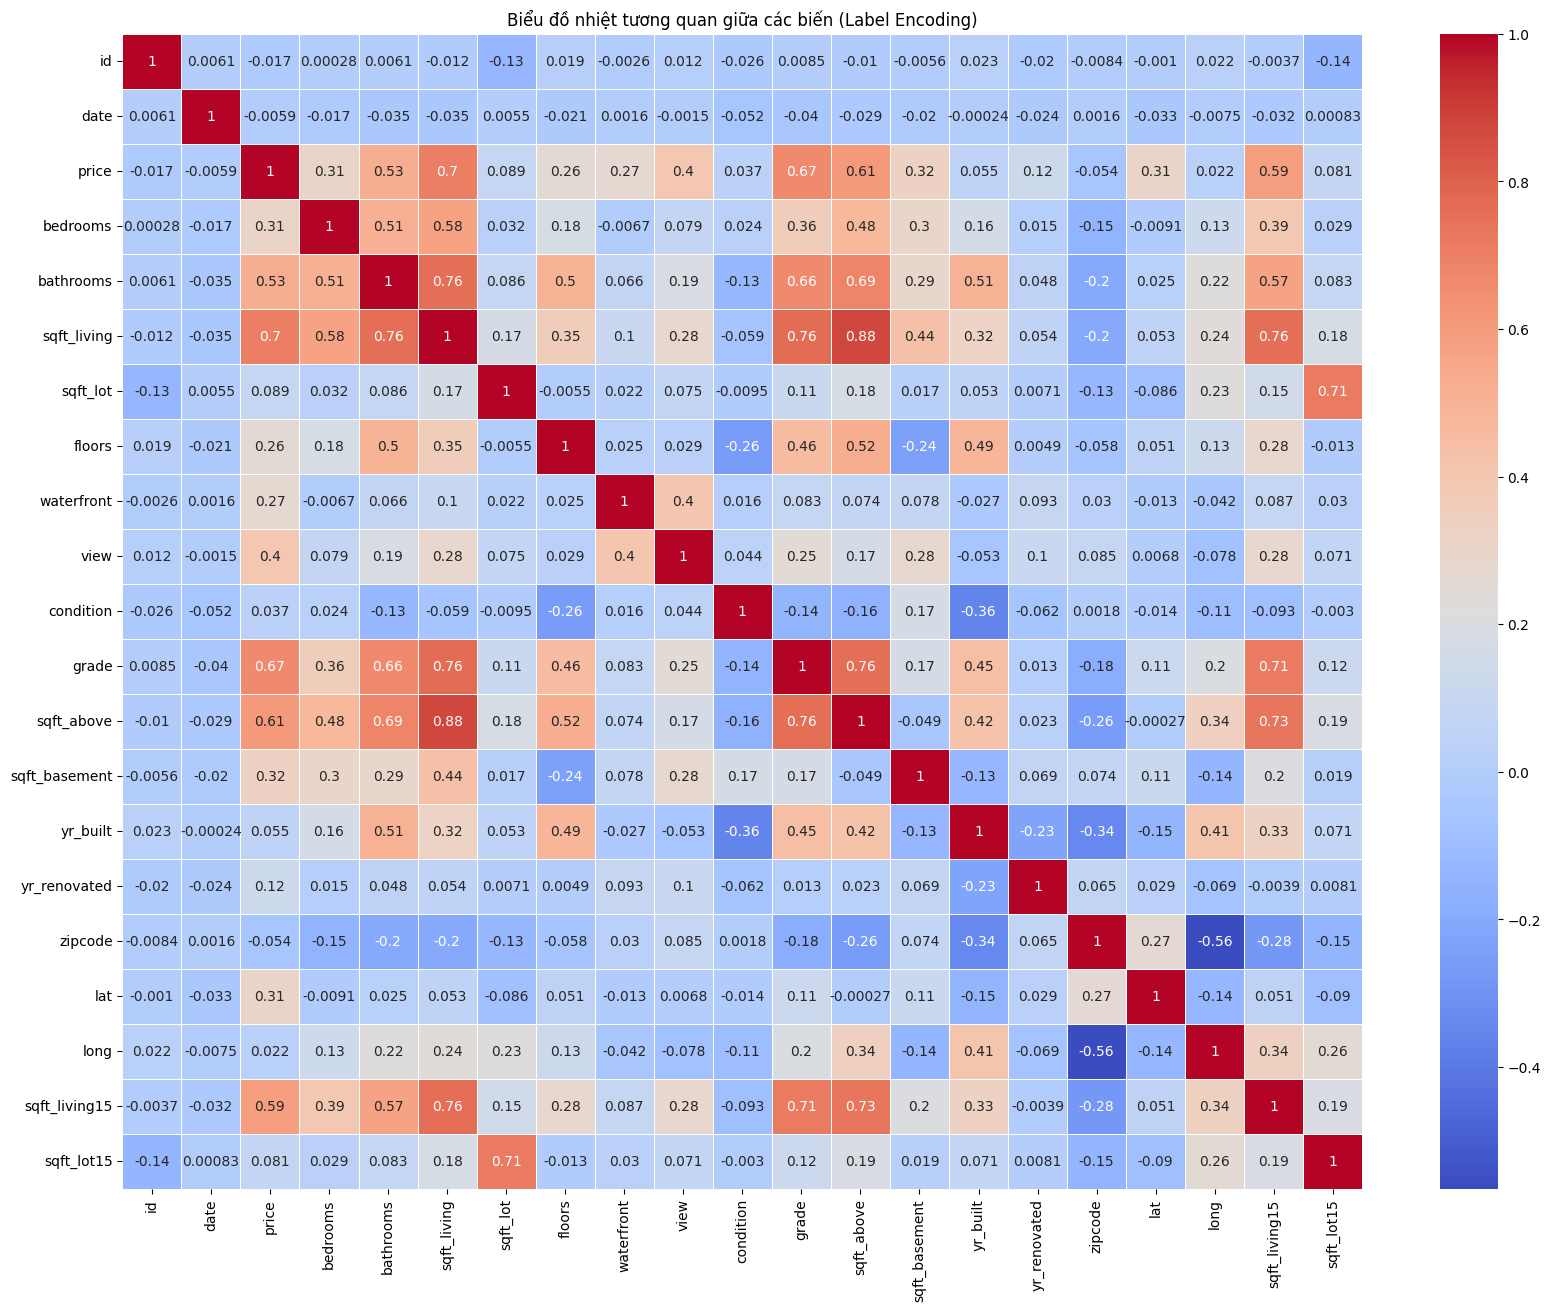

In [37]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo một bản sao của dataframe để mã hóa
df_label_encoded = df.copy()

# Áp dụng Label Encoding cho các cột phân loại
label_encoders = {}
for column in df_label_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_label_encoded[column] = le.fit_transform(df_label_encoded[column])
    label_encoders[column] = le

# Tính toán ma trận tương quan
corr_matrix = df_label_encoded.corr()

# Vẽ biểu đồ nhiệt
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Biểu đồ nhiệt tương quan giữa các biến (Label Encoding)')
plt.show()

In [38]:
# In ra tương quan giữa price và các biến khác
price_corr = corr_matrix['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702442
grade            0.667467
sqft_above       0.606948
sqft_living15    0.586940
bathrooms        0.526070
view             0.395617
sqft_basement    0.323698
bedrooms         0.307623
lat              0.306317
waterfront       0.267524
floors           0.256663
yr_renovated     0.123731
sqft_lot         0.088834
sqft_lot15       0.080912
yr_built         0.054599
condition        0.036628
long             0.022188
date            -0.005942
id              -0.016935
zipcode         -0.054338
Name: price, dtype: float64


<p> Các biến có tương quan cao (trên 0.5): sqft_living, grade, sqft_above, sqft_living15, bathrooms. </p> 

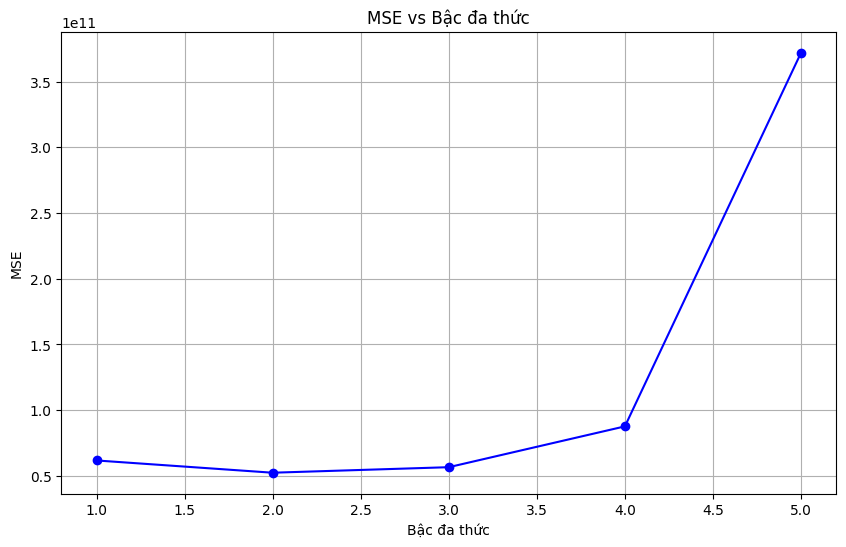

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Chọn các biến có tương quan cao với price
X_high_corr = df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']]
y = df['price']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_high_corr_scaled = scaler.fit_transform(X_high_corr)

# Hàm get_mse
def get_mse(degree, X, y):
	poly_features = PolynomialFeatures(degree=degree, include_bias=False)
	X_poly = poly_features.fit_transform(X)
	model = LinearRegression()
	mse = -cross_val_score(model, X_poly, y, scoring='neg_mean_squared_error', cv=5).mean()
	return mse

# Chọn bậc cho mô hình hồi quy đa thức
degrees = np.arange(1,6) 
mses = [get_mse(degree, X_high_corr_scaled, df['price']) for degree in degrees]

plt.figure(figsize=(10, 6))
plt.plot(degrees, mses, marker='o', color='b')
plt.title('MSE vs Bậc đa thức')
plt.xlabel('Bậc đa thức')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

In [42]:
# Hồi quy đa thức bậc 2 giữa price & các biến đã chuẩn hóa
poly_features = PolynomialFeatures(degree=2)
X_high_corr_poly = poly_features.fit_transform(X_high_corr_scaled)
lr = LinearRegression()
lr.fit(X_high_corr_poly, y)
print('Intercept:', lr.intercept_)
print('Coefficients:', lr.coef_)

Intercept: 498510.2801281085
Coefficients: [      0.          199459.57351042  123139.53946018 -109272.42586794
   37099.22301572  -14231.49172647  -79935.24257641   60886.42596755
  177680.53467737   21484.32980215  -10446.74779358   13855.96962943
  -19412.90557638  -22912.2382627    10183.86289496  -76738.60008437
  -47331.04073901    2799.05166736   22240.7201062   -13189.61485474
   16582.50254752]


Mean squared error: 50830719721.5842
R^2: 0.6245580721668775


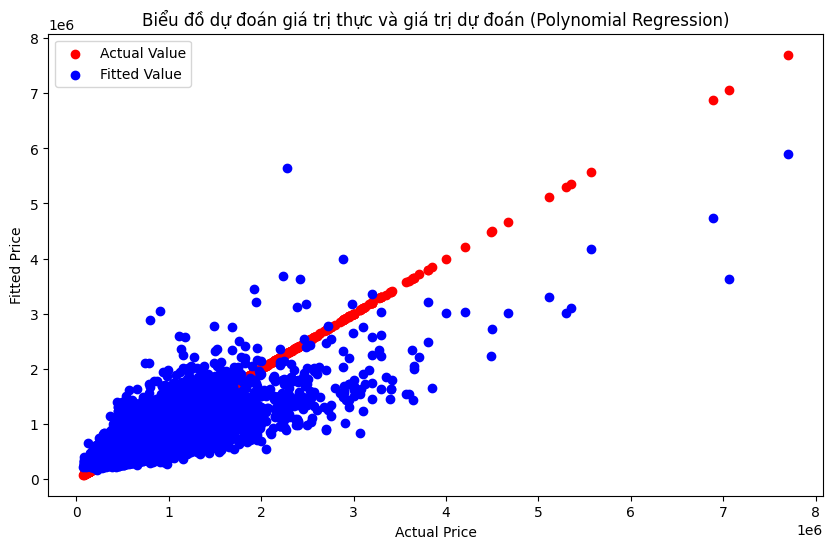

In [43]:
# Đánh giá mô hình
Y_pred = lr.predict(X_high_corr_poly)
mse = mean_squared_error(y, Y_pred)
print('Mean squared error:', mse)
r2 = r2_score(y, Y_pred)
print('R^2:', r2)

# Vẽ biểu đồ dự đoán:
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['price'], color='r', label='Actual Value')
plt.scatter(df['price'], Y_pred, color='b', label='Fitted Value')
plt.title('Biểu đồ dự đoán giá trị thực và giá trị dự đoán (Polynomial Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Fitted Price')
plt.legend()
plt.show()

<p> Nhận xét: Giá trị MSE rất lớn (50830719721.5842), điều này cho thấy sai số bình quân của mô hình là khá cao. Nói cách khác, mô hình dự đoán không chính xác lắm so với giá trị thực tế. </p>
<p> Giá trị R-squared là 0.6245, không quá thấp, nhưng giá trị này cũng cho thấy còn một phần lớn sự biến động của giá chưa được mô hình giải thích. </p>
<p> Nhìn chung các điểm giá dự đoán nằm tương đối so với vùng phân bố các giá trị thực tế, tuy nhiên sự phân tán của các điểm dữ liệu quanh đường hồi quy cho thấy vẫn còn một số sai số nhất định. </p>